Wrangle Module

In [67]:
# os functions
import os

# local files
from env import host, user, password
import wrangle as w

# df manipulations
import pandas as pd
import numpy as np

# visualization
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

import warnings
warnings.filterwarnings("ignore")

In [2]:
zillow = w.get_zillow_data()

Using cached csv


In [ ]:
# query = '''
# SELECT bedroomcnt, bathroomcnt, calcuatedfinishedsquarefeet, taxvaluedollarcnt, yearbuilt, taxamount, fips
# FROM properties_2017

# LEFT JOIN propertylandusetype USING (propertylandusetypeid)

# WHERE propertylandusedesc IN ("Single Family Residential", "Inferred Single Family Residential")

# '''

In [3]:
zillow.head()

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,fips
0,0.0,0.0,NaN,27516.0,NaN,NaN,6037.0
1,0.0,0.0,NaN,10.0,NaN,NaN,6037.0
2,0.0,0.0,NaN,10.0,NaN,NaN,6037.0
3,0.0,0.0,NaN,2108.0,NaN,174.21,6037.0
4,4.0,2.0,3633.0,296425.0,2005.0,6941.39,6037.0


In [4]:
zillow.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2152864 entries, 0 to 2152863
Data columns (total 7 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   bedroomcnt                    float64
 1   bathroomcnt                   float64
 2   calculatedfinishedsquarefeet  float64
 3   taxvaluedollarcnt             float64
 4   yearbuilt                     float64
 5   taxamount                     float64
 6   fips                          float64
dtypes: float64(7)
memory usage: 115.0 MB


In [5]:
zillow.shape

(2152864, 7)

In [6]:
zillow.describe().T

,count,mean,std,min,25%,50%,75%,max
bedroomcnt,2152853.0,3.287195,0.954757,0.00,3.0000,3.000,4.0000,25.00
bathroomcnt,2152853.0,2.230687,0.999281,0.00,2.0000,2.000,3.0000,32.00
calculatedfinishedsquarefeet,2144379.0,1862.855178,1222.125124,1.00,1257.0000,1623.000,2208.0000,952576.00
taxvaluedollarcnt,2152371.0,461896.052361,699675.940049,1.00,188170.0000,327671.000,534527.0000,98428909.00
yearbuilt,2143526.0,1960.949681,22.162196,1801.00,1949.0000,1958.000,1976.0000,2016.00
taxamount,2148422.0,5634.863752,8178.908996,1.85,2534.9725,4108.945,6414.3175,1337755.86
fips,2152864.0,6048.377330,20.433289,6037.00,6037.0000,6037.000,6059.0000,6111.00


In [7]:
zillow.isnull().sum()

bedroomcnt                        11
bathroomcnt                       11
calculatedfinishedsquarefeet    8485
taxvaluedollarcnt                493
yearbuilt                       9338
taxamount                       4442
fips                               0
dtype: int64

In [ ]:
# df.info(null_counts=True)
# df = df.rename(columns = {'bedroomcnt': 'bedrooms',
#                         'bathroomcnt': 'bathrooms',
#                          'calculatedfinishedsquarefeet': 'area',
#                          'taxvaluedollarcnt': 'tax_value',
#                          'yearbuilt': 'year_built'})

In [8]:
# oof, need to really consider how to handle the missing values for sqft, yearbuild, and taxamount

In [9]:
zillow.isnull().any()

bedroomcnt                       True
bathroomcnt                      True
calculatedfinishedsquarefeet     True
taxvaluedollarcnt                True
yearbuilt                        True
taxamount                        True
fips                            False
dtype: bool

In [10]:
zillow.calculatedfinishedsquarefeet.value_counts(dropna=False, ascending=True)

24920.0       1
10127.0       1
35046.0       1
8803.0        1
16134.0       1
           ... 
1400.0     3833
1120.0     4362
1080.0     4389
1200.0     5195
NaN        8485
Name: calculatedfinishedsquarefeet, Length: 10581, dtype: int64

In [11]:
8485 / 2152864 * 100

0.3941261500958723

In [12]:
zillow2 = zillow.dropna()

In [13]:
zillow2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2140235 entries, 4 to 2152863
Data columns (total 7 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   bedroomcnt                    float64
 1   bathroomcnt                   float64
 2   calculatedfinishedsquarefeet  float64
 3   taxvaluedollarcnt             float64
 4   yearbuilt                     float64
 5   taxamount                     float64
 6   fips                          float64
dtypes: float64(7)
memory usage: 130.6 MB


In [14]:
(2140235 / 2152864) * 100

99.413386075479

In [15]:
# If we simply drop all NaN values we retain 99.4% of the data. This is worth consideration for solution to NaN
# values

In [16]:
2152864 - 2140235

12629

In [17]:
# The NaN values are 'spread out' as in they're not just within the same rows

In [18]:
zillow2.describe().T

,count,mean,std,min,25%,50%,75%,max
bedroomcnt,2140235.0,3.301419,0.932600,0.00,3.00,3.00,4.00,25.00
bathroomcnt,2140235.0,2.240352,0.990549,0.00,2.00,2.00,3.00,32.00
calculatedfinishedsquarefeet,2140235.0,1863.193970,1221.754161,1.00,1258.00,1623.00,2208.00,952576.00
taxvaluedollarcnt,2140235.0,460641.625164,677157.635675,22.00,189166.00,328296.00,534606.00,90188462.00
yearbuilt,2140235.0,1960.967545,22.150563,1801.00,1949.00,1958.00,1976.00,2016.00
taxamount,2140235.0,5616.711322,7814.562798,6.34,2540.85,4111.47,6411.93,1078101.87
fips,2140235.0,6048.309556,20.344910,6037.00,6037.00,6037.00,6059.00,6111.00


In [19]:
zillow.describe().T

,count,mean,std,min,25%,50%,75%,max
bedroomcnt,2152853.0,3.287195,0.954757,0.00,3.0000,3.000,4.0000,25.00
bathroomcnt,2152853.0,2.230687,0.999281,0.00,2.0000,2.000,3.0000,32.00
calculatedfinishedsquarefeet,2144379.0,1862.855178,1222.125124,1.00,1257.0000,1623.000,2208.0000,952576.00
taxvaluedollarcnt,2152371.0,461896.052361,699675.940049,1.00,188170.0000,327671.000,534527.0000,98428909.00
yearbuilt,2143526.0,1960.949681,22.162196,1801.00,1949.0000,1958.000,1976.0000,2016.00
taxamount,2148422.0,5634.863752,8178.908996,1.85,2534.9725,4108.945,6414.3175,1337755.86
fips,2152864.0,6048.377330,20.433289,6037.00,6037.0000,6037.000,6059.0000,6111.00


In [20]:
# Dropping all NaN does not substantially change any of the averages, and actually removes our max house
# that appeared to be somewhat of an outlier for value

In [21]:
zillow2.bedroomcnt.value_counts()

3.0     962944
4.0     633608
2.0     334221
5.0     150671
6.0      25117
1.0      22895
7.0       4792
0.0       4397
8.0       1103
9.0        290
10.0       118
11.0        34
13.0        15
12.0        12
14.0         7
15.0         5
18.0         3
16.0         2
25.0         1
Name: bedroomcnt, dtype: int64

In [22]:
zillow2.bedroomcnt = zillow2.bedroomcnt.astype(int)

/opt/homebrew/anaconda3/lib/python3.9/site-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [23]:
zillow2.bathroomcnt.value_counts()

2.00     942463
3.00     422398
1.00     412582
2.50     142827
4.00      82039
1.50      31157
3.50      28464
5.00      28306
4.50      19474
6.00      10717
5.50       6201
7.00       4381
0.00       4274
8.00       1681
6.50       1330
9.00        707
7.50        382
10.00       322
11.00       145
8.50        108
12.00        73
9.50         50
13.00        39
14.00        25
15.00        17
0.50         16
10.50        14
16.00        12
18.00         8
20.00         6
17.00         4
1.75          3
12.50         3
11.50         3
19.50         1
14.50         1
32.00         1
19.00         1
Name: bathroomcnt, dtype: int64

In [24]:
zillow2.yearbuilt.value_counts()

1955.0    84329
1950.0    71606
1954.0    69069
1953.0    62270
1956.0    61858
          ...  
1855.0        1
1879.0        1
1833.0        1
1840.0        1
1874.0        1
Name: yearbuilt, Length: 153, dtype: int64

In [25]:
zillow2.yearbuilt = zillow2.yearbuilt.astype(int)

In [26]:
zillow2.fips.value_counts()

6037.0    1425207
6059.0     552057
6111.0     162971
Name: fips, dtype: int64

In [27]:
zillow2.fips = zillow2.fips.astype(int)

In [28]:
zillow2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2140235 entries, 4 to 2152863
Data columns (total 7 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   bedroomcnt                    int64  
 1   bathroomcnt                   float64
 2   calculatedfinishedsquarefeet  float64
 3   taxvaluedollarcnt             float64
 4   yearbuilt                     int64  
 5   taxamount                     float64
 6   fips                          int64  
dtypes: float64(4), int64(3)
memory usage: 130.6 MB


In [29]:
zillow2.calculatedfinishedsquarefeet.value_counts()

1200.0     5184
1080.0     4376
1120.0     4354
1400.0     3828
1440.0     3684
           ... 
10180.0       1
13169.0       1
9095.0        1
10525.0       1
24920.0       1
Name: calculatedfinishedsquarefeet, Length: 10557, dtype: int64

In [30]:
zillow2.calculatedfinishedsquarefeet = zillow2.calculatedfinishedsquarefeet.astype(int)

In [31]:
zillow2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2140235 entries, 4 to 2152863
Data columns (total 7 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   bedroomcnt                    int64  
 1   bathroomcnt                   float64
 2   calculatedfinishedsquarefeet  int64  
 3   taxvaluedollarcnt             float64
 4   yearbuilt                     int64  
 5   taxamount                     float64
 6   fips                          int64  
dtypes: float64(3), int64(4)
memory usage: 130.6 MB


In [32]:
# Changed bedroomcnt, sqft, yearbuilt, and fips to int for more appropriate data types

In [33]:
# Forgot to do this earlier
zillow2.drop_duplicates(inplace=True)

/opt/homebrew/anaconda3/lib/python3.9/site-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [34]:
# Resulted in dropping 10,021 duplicates
zillow2.info()
2140235 - 2130214

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2130214 entries, 4 to 2152863
Data columns (total 7 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   bedroomcnt                    int64  
 1   bathroomcnt                   float64
 2   calculatedfinishedsquarefeet  int64  
 3   taxvaluedollarcnt             float64
 4   yearbuilt                     int64  
 5   taxamount                     float64
 6   fips                          int64  
dtypes: float64(3), int64(4)
memory usage: 130.0 MB


10021

In [35]:
# Let's do a little bit of visualizations of the column distributions

In [36]:
cols = zillow2.columns.values.tolist()
# cols = list(zillow2)

In [37]:
cols

['bedroomcnt',
 'bathroomcnt',
 'calculatedfinishedsquarefeet',
 'taxvaluedollarcnt',
 'yearbuilt',
 'taxamount',
 'fips']

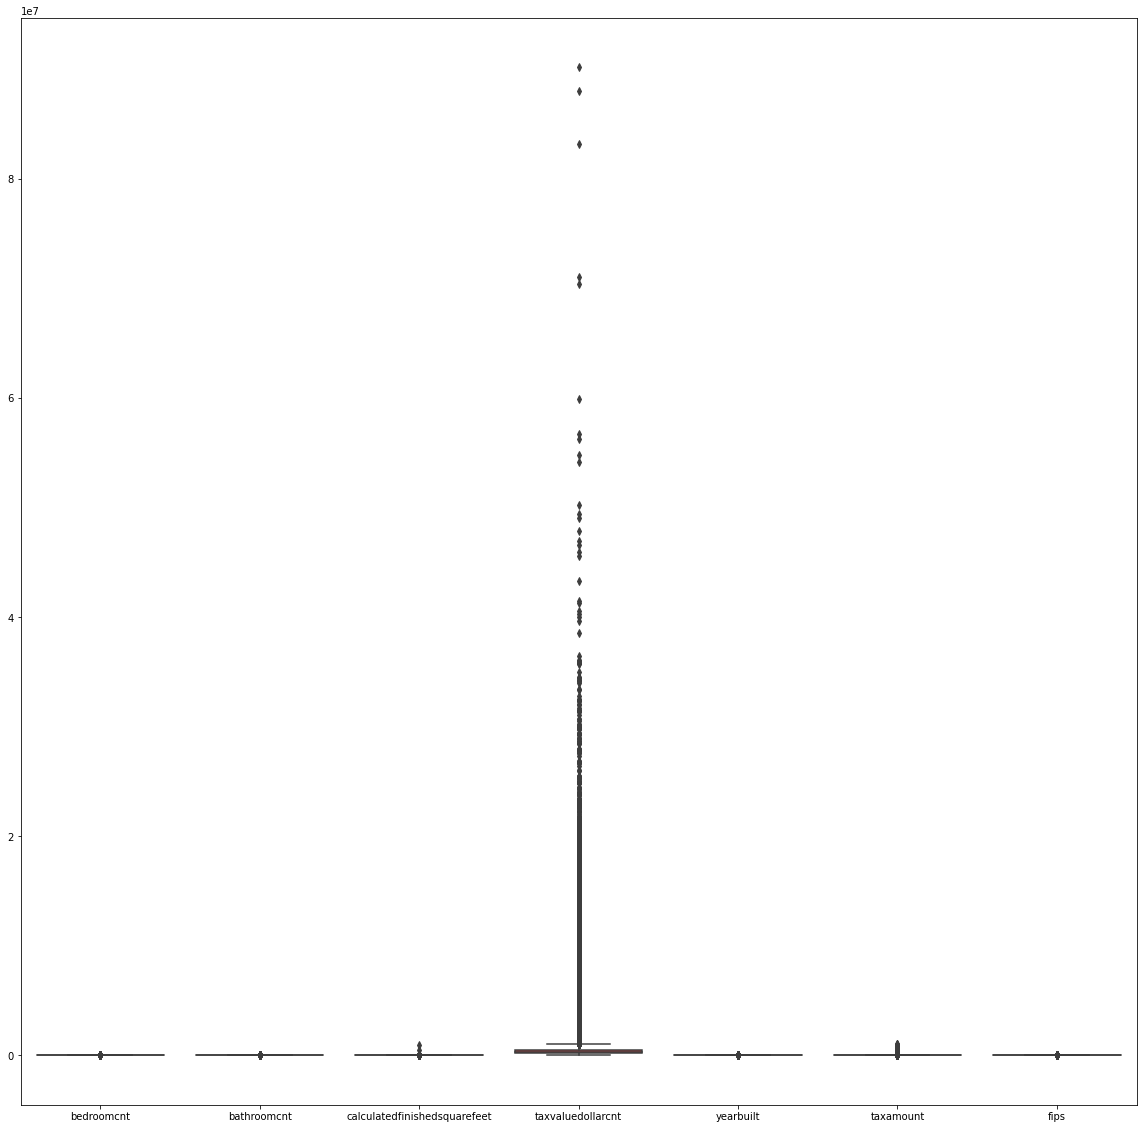

In [38]:
plt.figure(figsize=(20,20))
sns.boxplot(data=zillow2)
plt.show()

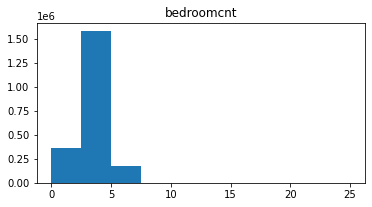

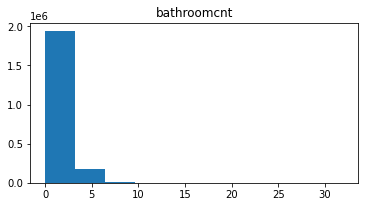

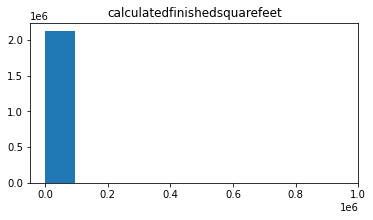

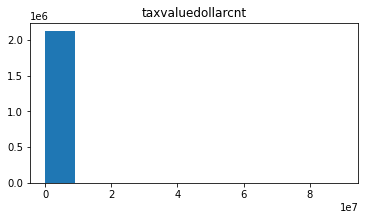

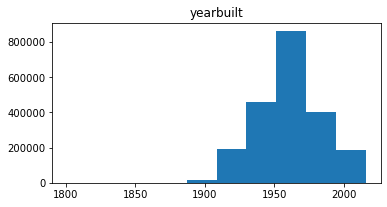

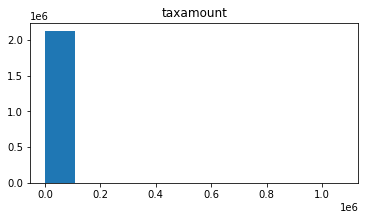

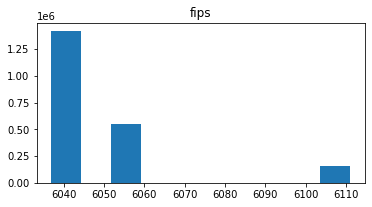

In [39]:
for i, col in enumerate(cols):
    plt.figure(figsize=(20,10))
    plot_number = i + 1
    plt.subplot(3, 3, plot_number)
    plt.title(col)
    zillow2[col].hist()
    plt.grid(False)

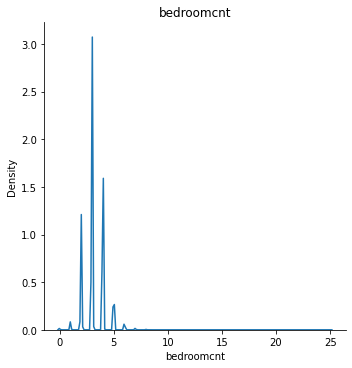

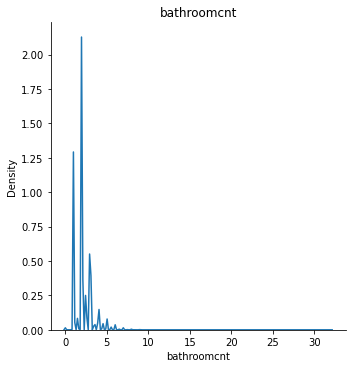

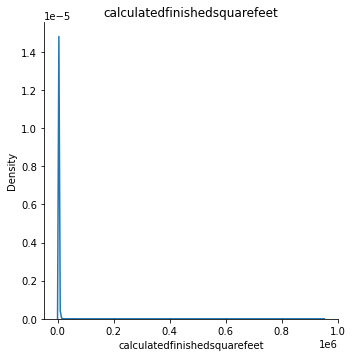

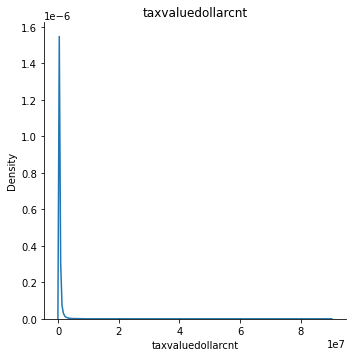

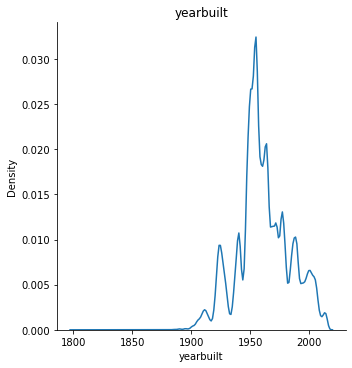

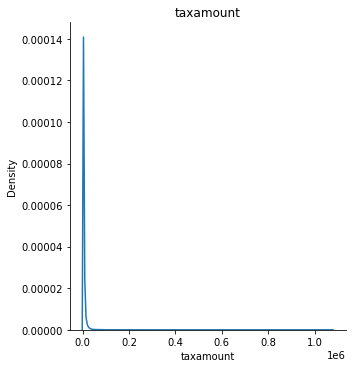

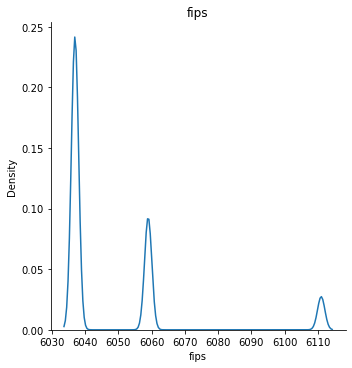

In [40]:
for col in cols:
    sns.displot(zillow2, x=col, kind='kde')
    plt.title(col)
    plt.show()

In [41]:
# Converting fips to a str is more appropriate than int
zillow2.fips = zillow2.fips.astype(str)

/opt/homebrew/anaconda3/lib/python3.9/site-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [42]:
zillow2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2130214 entries, 4 to 2152863
Data columns (total 7 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   bedroomcnt                    int64  
 1   bathroomcnt                   float64
 2   calculatedfinishedsquarefeet  int64  
 3   taxvaluedollarcnt             float64
 4   yearbuilt                     int64  
 5   taxamount                     float64
 6   fips                          object 
dtypes: float64(3), int64(3), object(1)
memory usage: 194.5+ MB


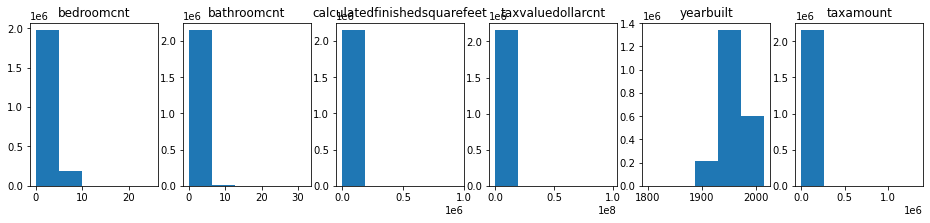

In [70]:
plt.figure(figsize=(16,3))

# List of columns
cols = [col for col in zillow.columns if col not in ['fips', 'year_built']]

for i, col in enumerate(cols):
    # i starts at 0, but plot nos should start at 1
    plot_number = i + 1
    # Create subplot
    plt.subplot(1, len(cols), plot_number)
    # Title which column name
    plt.title(col)
    # Display histogram for column
    zillow[col].hist(bins=5)
    # Hide gridlines
    plt.grid(False)
    # turn off scientific notation
    plt.ticklabel_format(useOffset=False)

<AxesSubplot:>

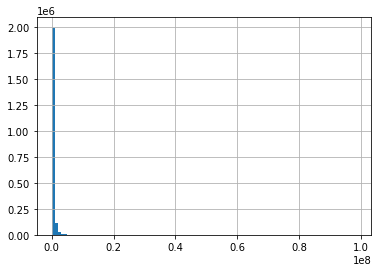

In [72]:
# Looking at tax_value in closer detail
zillow['taxvaluedollarcnt'].hist(bins=100)

If we want to deal with any outliers
- If we presume that we are going to use our data to build a model that focuses on median home values, then we can drop the outliers
- May help with our null value issue

In [74]:
def remove_outliers(df, k, col_list):
    '''
    remove outliers from a list of columns in a dataframe
    and return that dataframe
    '''
    for col in col_list:
        q1, q3 = df[col].quantile([.25, .75]) # get quartiles
        iqr = q3 - q1 # calculate interquartile range
        upper_bound = q3 + k * iqr # get upper bound
        lower_bound = q1 - k * iqr # get lower bound
        # return dataframe without outliers
        df = df[(df[col] > lower_bound) & (df[col] < upper_bound)]
        return df

In [75]:
def remove_outliers_v2(df, k, col_list):
    ''' remove outliers from a list of columns in a dataframe 
        and return that dataframe
    '''
    # Create a column that will label our rows as containing an outlier value or not
    num_obs = df.shape[0]
    df['outlier'] = False
    for col in col_list:

        q1, q3 = df[col].quantile([.25, .75])  # get quartiles
        
        iqr = q3 - q1   # calculate interquartile range
        
        upper_bound = q3 + k * iqr   # get upper bound
        lower_bound = q1 - k * iqr   # get lower bound

        # update the outlier label any time that the value is outside of boundaries
        df['outlier'] = np.where(((df[col] < lower_bound) | (df[col] > upper_bound)) & (df.outlier == False), True, df.outlier)
    
    df = df[df.outlier == False]
    df.drop(columns=['outlier'], inplace=True)
    print(f"Number of observations removed: {num_obs - df.shape[0]}")
        
    return df

In [76]:
# df = remove_outliers(df, 1.5, ['bedrooms', 'bathrooms', 'area', 'tax_value', 'taxamount'])

In [43]:

zillow2.fips.value_counts()

6037    1422505
6059     546579
6111     161130
Name: fips, dtype: int64

In [44]:
zillow2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2130214 entries, 4 to 2152863
Data columns (total 7 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   bedroomcnt                    int64  
 1   bathroomcnt                   float64
 2   calculatedfinishedsquarefeet  int64  
 3   taxvaluedollarcnt             float64
 4   yearbuilt                     int64  
 5   taxamount                     float64
 6   fips                          object 
dtypes: float64(3), int64(3), object(1)
memory usage: 194.5+ MB


In [45]:
zillow2.fips = '0' + zillow2.fips

In [46]:
zillow2.fips.head()

4     06037
6     06037
7     06037
11    06037
14    06037
Name: fips, dtype: object

In [47]:
zillow2.fips.value_counts()

06037    1422505
06059     546579
06111     161130
Name: fips, dtype: int64

In [48]:
#train, validate, test = w.prep_zillow(zillow)

In [49]:
#train.shape, validate.shape, test.shape

In [50]:
#train.head()

In [52]:
train, validate, test = w.wrangle_zillow()

Using cached csv


In [53]:
train.shape, validate.shape, test.shape

((1192919, 9), (511252, 9), (426043, 9))

In [54]:
train.head()

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,fips,fips_06059,fips_06111
553191,4,2.0,1556,373090.0,1923,4579.25,06037,0,0
1209133,3,2.0,1513,74070.0,1937,986.55,06037,0,0
174634,4,2.0,2040,138000.0,1954,2553.05,06037,0,0
170584,3,2.0,1834,263870.0,1959,3139.76,06059,1,0
2001227,2,2.0,1225,335603.0,1975,3461.38,06059,1,0


In [56]:
train.bathroomcnt.value_counts()

2.00     525611
3.00     235732
1.00     230359
2.50      78927
4.00      45826
1.50      16954
5.00      15790
3.50      15771
4.50      10914
6.00       5965
5.50       3459
7.00       2473
0.00       2340
8.00        954
6.50        750
9.00        383
7.50        220
10.00       184
11.00        77
8.50         59
12.00        47
9.50         36
13.00        26
14.00        14
0.50         11
15.00         9
10.50         8
20.00         6
16.00         5
18.00         3
17.00         3
12.50         2
1.75          1
Name: bathroomcnt, dtype: int64

In [61]:
train.bedroomcnt.value_counts()

3     536985
4     353001
2     186330
5      83883
6      14080
1      12733
7       2675
0       2330
8        647
9        164
10        56
11        12
13         8
12         6
14         5
15         2
16         1
25         1
Name: bedroomcnt, dtype: int64

In [60]:
train.isnull().sum()

bedroomcnt                      0
bathroomcnt                     0
calculatedfinishedsquarefeet    0
taxvaluedollarcnt               0
yearbuilt                       0
taxamount                       0
fips                            0
fips_06059                      0
fips_06111                      0
dtype: int64

1200     2823
1080     2443
1120     2438
1400     2149
1440     2032
         ... 
10605       1
7947        1
7146        1
7423        1
7979        1
Name: calculatedfinishedsquarefeet, Length: 9417, dtype: int64